# Feature Imporatnce Analysis

In [146]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configparser
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from src.utils import utils
from src.modelling import training as train
from src.modelling import models, training



%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read data

In [147]:
proj_root = utils.get_proj_root()
config = configparser.ConfigParser(interpolation=None)
config.read(proj_root.joinpath('config/data_config.ini'))

final_year = int(config['year_limits']['end_year'])
training_data_rel_path = config['data_paths']['preprocessed_data_path']

training_data_path =  proj_root.joinpath(training_data_rel_path)
training_data_subset_path  = proj_root.joinpath(config['data_paths']['training_subset_path'])
testing_data_subset_path  = proj_root.joinpath(config['data_paths']['testing_subset_path'])



model_output_path = proj_root.joinpath(config['modelling_paths']['logistic_regression_model_path'])

In [148]:

train_data =  pd.read_csv(training_data_subset_path)
test_data = pd.read_csv(testing_data_subset_path)
train_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2012,24,291,2.198387,-2.275946,1.385806,-0.090461,49.567449,3.987852,89.289449,...,6.939145,0.025377,-5.500411,8.692139,5.900833,0.14,40.000000,2.36,7.272727,0
1,2013,24,291,1.698186,-22.753086,1.012270,-26.954450,50.284895,1.447414,87.567366,...,21.913077,0.018089,-28.717392,12.326051,41.806877,0.11,-21.428571,2.54,7.627119,0
2,2014,24,291,1.961487,15.504836,1.127209,11.354593,48.611609,-3.327613,82.245394,...,-39.851336,0.020773,14.836058,13.065263,5.997151,0.09,-18.181818,3.42,34.645669,0
3,2015,24,291,1.543411,-21.314241,0.852768,-24.346986,50.082909,3.026645,83.473315,...,799.567847,0.027175,30.819267,12.318266,-5.717433,0.13,44.444444,4.10,19.883041,0
4,2016,24,291,1.885512,22.165260,1.136839,33.311664,53.242552,6.308824,82.149269,...,-84.149916,0.024801,-8.738086,13.479738,9.428861,0.40,207.692308,4.44,8.292683,0


In [149]:
test_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2021,24,291,1.704815,-9.559027,1.043165,-14.902195,48.109178,-9.839675,96.808992,...,67.702091,0.033253,-0.909598,15.729376,-12.979421,0.08,-78.947368,5.92,0.680272,0
1,2021,96,36,1.566500,-14.191051,1.131391,-21.328131,65.431631,-11.277742,73.344031,...,-112.480300,0.012391,-30.862468,19.078414,21.967224,0.08,-78.947368,1.06,8.163265,0
2,2021,63,4,1.849599,7.740228,1.277070,12.122625,54.968195,-18.741994,101.543130,...,-69.722616,0.012897,-2.300018,23.954222,-12.035499,0.08,-78.947368,1.80,25.000000,0
3,2021,31,3,0.793544,-5.912486,0.562795,-6.766883,64.800701,-7.822868,65.443082,...,-118.942510,0.038643,-10.545641,11.593723,-68.566197,0.08,-78.947368,5.20,10.169492,0
4,2021,49,6,1.251937,-10.687424,1.139527,-11.782243,70.266362,8.749094,0.000000,...,-45.271038,0.010467,-21.579906,21.516834,24.968678,0.08,-78.947368,3.61,10.060976,0


In [150]:
label_col_name = 'dps_change_next_year'
optimal_features  = utils.load_value(proj_root.joinpath(config['modelling_paths']['optimal_features']))
X_train, y_train = train.split_Xy(train_data, label_col_name=label_col_name)
X_train = X_train[optimal_features]

X_test, y_test = train.split_Xy(test_data, label_col_name=label_col_name)
X_test = X_test[optimal_features]

# modelling

In [151]:
list(config['modelling_paths'].keys())

['feature_importance',
 'model_performance_with_feature_drop',
 'optimal_features',
 'logistic_regression_model_path']

In [158]:
config._sections['API']

{'fmp_base_url': 'https://financialmodelingprep.com/api/v3',
 'fred_base_url': 'https://api.stlouisfed.org/fred/series/observations?series_id=FEDFUNDS&'}

In [224]:
import logging
from src.data_processing import augmentation as aug
logger = logging.getLogger(__name__)
proj_root = utils.get_proj_root()

config = configparser.ConfigParser(interpolation=None)
config.read(proj_root.joinpath('config/data_config.ini'))

final_year = int(config['year_limits']['end_year'])
training_data_rel_path = config['data_paths']['preprocessed_data_path']



training_data_path =  proj_root.joinpath(training_data_rel_path)
training_data_subset_path  = proj_root.joinpath(config['data_paths']['training_subset_path'])
testing_data_subset_path  = proj_root.joinpath(config['data_paths']['testing_subset_path'])
feature_set_path = proj_root.joinpath(config['modelling_paths']['optimal_features'])
model_output_dir = proj_root.joinpath(config['modelling_paths']['model_output'])


label_col_name = 'dps_change_next_year'
optimal_features = train.get_features(feature_set_path)

# MODEL_LIST = ['logistic_regression']
##=====================
model_name =  'logistic_regression'
model_name = 'random_forest'
tune_trials = 1

def get_model_class(model_name:str):
    if model_name == 'logistic_regression':
        model = models.LogisticWrapper
    elif model_name == 'random_forest':
        model = models.RandomForestWrapper

    return model

model_params = config._sections[model_name]
print(model_params)
model_class = get_model_class(model_name=model_name)
model = model_class(**model_params)

# get data
training_data = train.get_training_data(file_path=training_data_path)

# split dataset
training_data_subset, testing_data_subset = train.train_test_split(df=training_data, final_year=final_year)

training_data_subset_resampled = aug.balance_data(training_data_subset, label_col_name=label_col_name)

training_data_subset = training_data_subset_resampled[optimal_features+[label_col_name]]
testing_data_subset = testing_data_subset[optimal_features+[label_col_name]]


X_train, y_train = train.split_Xy(training_data_subset, label_col_name=label_col_name)

model_output_path = model_output_dir.joinpath(model_name+'.pkl')
print(model_output_path)
# trainer = training.ModelTrainer(model_class=model, X=X_train, y=y_train,
#                                 training_data_path=training_data_subset_path,
#                                 model_output_path=model_output_path)
trainer = training.ModelTrainer(model_class=model,
                                training_data=training_data_subset,
                                testing_data=testing_data_subset,
                                label_col_name=label_col_name,
                                model_output_path=model_output_path)

trainer.tune_model(n_trials=tune_trials)
model = trainer.train_model(save_model=True)

[I 2023-11-17 13:48:51,075] A new study created in memory with name: no-name-3b180ddf-51e5-4e79-81f0-c7f987c66bae


{'n_jobs': '-1'}
/home/aroge/projects/dividend-cut-predictor/models/random_forest.pkl


[I 2023-11-17 13:48:53,472] Trial 0 finished with value: 0.975554609126014 and parameters: {'n_estimators': 119, 'max_depth': 44, 'min_samples_split': 5, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.975554609126014.


Trial 0, n_estimators: 119, max_depth: 44, min_samples_split: 5, min_samples_leaf: 15, ROC-AUC: 0.975554609126014
best score is: 0.975554609126014
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [226]:
trainer.evaluate_model(show_report=True)

[0 1]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       465
           1       0.22      0.55      0.32        11

    accuracy                           0.95       476
   macro avg       0.61      0.75      0.64       476
weighted avg       0.97      0.95      0.96       476



0.9116324535679374

In [213]:
model = utils.load_value(model_output_path)
test_predicted_values = model.predict(testing_data_subset[optimal_features])
model.score(testing_data_subset[optimal_features], testing_data_subset[label_col_name])

0.9516806722689075

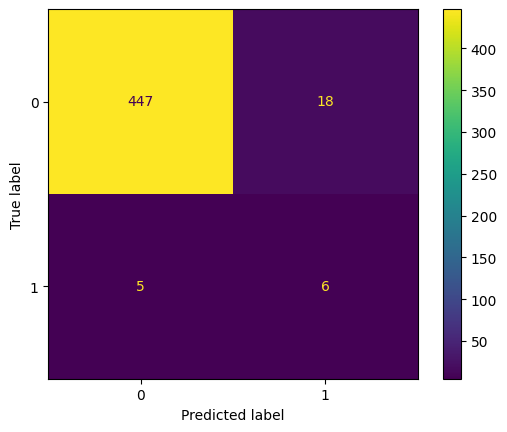

In [215]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_true=testing_data_subset[label_col_name],
                      y_pred=test_predicted_values)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [107]:


solver='liblinear'; n_jobs=-1; n_trials=100

log_reg = models.LogisticWrapper(solver=solver, n_jobs=n_jobs)
rf = models.RandomForestWrapper(n_jobs=-1)

model_output_path = proj_root.joinpath(config['modelling_paths']['logistic_regression_model_path'])
optimal_features  = utils.load_value(proj_root.joinpath(config['modelling_paths']['optimal_features']))

trainer = training.ModelTrainer(model_class=rf, X=X_train, y=y_train,
                                training_data_path=training_data_subset_path,
                                model_output_path=model_output_path)

In [108]:
trainer.tune_model(n_trials=n_trials)

[I 2023-11-15 13:03:44,512] A new study created in memory with name: no-name-adc1882b-7f55-43d0-887b-8eccc43cb3d5


[I 2023-11-15 13:03:45,445] Trial 0 finished with value: 0.9797277449179986 and parameters: {'n_estimators': 47, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9797277449179986.


Trial 0, n_estimators: 47, max_depth: 29, min_samples_split: 13, min_samples_leaf: 6, ROC-AUC: 0.9797277449179986


[I 2023-11-15 13:03:46,143] Trial 1 finished with value: 0.9801894027530913 and parameters: {'n_estimators': 33, 'max_depth': 25, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9801894027530913.


Trial 1, n_estimators: 33, max_depth: 25, min_samples_split: 13, min_samples_leaf: 5, ROC-AUC: 0.9801894027530913


[I 2023-11-15 13:03:47,795] Trial 2 finished with value: 0.9579000745737674 and parameters: {'n_estimators': 93, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9801894027530913.


Trial 2, n_estimators: 93, max_depth: 7, min_samples_split: 12, min_samples_leaf: 5, ROC-AUC: 0.9579000745737674


[I 2023-11-15 13:03:49,262] Trial 3 finished with value: 0.9768563374598509 and parameters: {'n_estimators': 77, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.9801894027530913.


Trial 3, n_estimators: 77, max_depth: 22, min_samples_split: 5, min_samples_leaf: 11, ROC-AUC: 0.9768563374598509


[I 2023-11-15 13:03:51,653] Trial 4 finished with value: 0.9770174610326381 and parameters: {'n_estimators': 130, 'max_depth': 34, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9801894027530913.


Trial 4, n_estimators: 130, max_depth: 34, min_samples_split: 14, min_samples_leaf: 10, ROC-AUC: 0.9770174610326381


[I 2023-11-15 13:03:53,328] Trial 5 finished with value: 0.9792003635460096 and parameters: {'n_estimators': 89, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9801894027530913.


Trial 5, n_estimators: 89, max_depth: 11, min_samples_split: 10, min_samples_leaf: 3, ROC-AUC: 0.9792003635460096


[I 2023-11-15 13:03:54,945] Trial 6 finished with value: 0.9722731580185782 and parameters: {'n_estimators': 87, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.9801894027530913.


Trial 6, n_estimators: 87, max_depth: 10, min_samples_split: 6, min_samples_leaf: 14, ROC-AUC: 0.9722731580185782


[I 2023-11-15 13:03:55,921] Trial 7 finished with value: 0.917819268686537 and parameters: {'n_estimators': 56, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.9801894027530913.


Trial 7, n_estimators: 56, max_depth: 4, min_samples_split: 8, min_samples_leaf: 7, ROC-AUC: 0.917819268686537


[I 2023-11-15 13:03:56,351] Trial 8 finished with value: 0.9488985030975409 and parameters: {'n_estimators': 21, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.9801894027530913.


Trial 8, n_estimators: 21, max_depth: 6, min_samples_split: 4, min_samples_leaf: 14, ROC-AUC: 0.9488985030975409


[I 2023-11-15 13:03:57,977] Trial 9 finished with value: 0.9752258939603508 and parameters: {'n_estimators': 86, 'max_depth': 33, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.9801894027530913.


Trial 9, n_estimators: 86, max_depth: 33, min_samples_split: 11, min_samples_leaf: 13, ROC-AUC: 0.9752258939603508


[I 2023-11-15 13:03:58,273] Trial 10 finished with value: 0.9762580370913376 and parameters: {'n_estimators': 9, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9801894027530913.


Trial 10, n_estimators: 9, max_depth: 48, min_samples_split: 15, min_samples_leaf: 2, ROC-AUC: 0.9762580370913376


[I 2023-11-15 13:03:59,100] Trial 11 finished with value: 0.9794505592776124 and parameters: {'n_estimators': 38, 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9801894027530913.


Trial 11, n_estimators: 38, max_depth: 23, min_samples_split: 13, min_samples_leaf: 6, ROC-AUC: 0.9794505592776124


[I 2023-11-15 13:04:00,066] Trial 12 finished with value: 0.9811572441135337 and parameters: {'n_estimators': 48, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 12 with value: 0.9811572441135337.


Trial 12, n_estimators: 48, max_depth: 32, min_samples_split: 9, min_samples_leaf: 4, ROC-AUC: 0.9811572441135337


[I 2023-11-15 13:04:00,732] Trial 13 finished with value: 0.9812391851149693 and parameters: {'n_estimators': 28, 'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 13 with value: 0.9812391851149693.


Trial 13, n_estimators: 28, max_depth: 43, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9812391851149693


[I 2023-11-15 13:04:01,952] Trial 14 finished with value: 0.9830301737104932 and parameters: {'n_estimators': 59, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.9830301737104932.


Trial 14, n_estimators: 59, max_depth: 45, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9830301737104932


[I 2023-11-15 13:04:04,257] Trial 15 finished with value: 0.9829598683370089 and parameters: {'n_estimators': 119, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.9830301737104932.


Trial 15, n_estimators: 119, max_depth: 50, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9829598683370089


[I 2023-11-15 13:04:06,585] Trial 16 finished with value: 0.9834028917931825 and parameters: {'n_estimators': 118, 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 16 with value: 0.9834028917931825.


Trial 16, n_estimators: 118, max_depth: 41, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9834028917931825


[I 2023-11-15 13:04:08,697] Trial 17 finished with value: 0.9782024986447242 and parameters: {'n_estimators': 112, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 16 with value: 0.9834028917931825.


Trial 17, n_estimators: 112, max_depth: 40, min_samples_split: 4, min_samples_leaf: 9, ROC-AUC: 0.9782024986447242


[I 2023-11-15 13:04:11,507] Trial 18 finished with value: 0.9823194686975857 and parameters: {'n_estimators': 143, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 16 with value: 0.9834028917931825.


Trial 18, n_estimators: 143, max_depth: 40, min_samples_split: 7, min_samples_leaf: 3, ROC-AUC: 0.9823194686975857


[I 2023-11-15 13:04:12,755] Trial 19 finished with value: 0.9825349721807717 and parameters: {'n_estimators': 60, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 16 with value: 0.9834028917931825.


Trial 19, n_estimators: 60, max_depth: 46, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9825349721807717


[I 2023-11-15 13:04:14,821] Trial 20 finished with value: 0.9819587129484859 and parameters: {'n_estimators': 105, 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 16 with value: 0.9834028917931825.


Trial 20, n_estimators: 105, max_depth: 39, min_samples_split: 6, min_samples_leaf: 3, ROC-AUC: 0.9819587129484859


[I 2023-11-15 13:04:17,218] Trial 21 finished with value: 0.983168878158797 and parameters: {'n_estimators': 121, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 16 with value: 0.9834028917931825.


Trial 21, n_estimators: 121, max_depth: 50, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.983168878158797


[I 2023-11-15 13:04:20,145] Trial 22 finished with value: 0.983441997883407 and parameters: {'n_estimators': 149, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.983441997883407.


Trial 22, n_estimators: 149, max_depth: 45, min_samples_split: 2, min_samples_leaf: 2, ROC-AUC: 0.983441997883407


[I 2023-11-15 13:04:23,104] Trial 23 finished with value: 0.9822349379239833 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 22 with value: 0.983441997883407.


Trial 23, n_estimators: 150, max_depth: 50, min_samples_split: 4, min_samples_leaf: 3, ROC-AUC: 0.9822349379239833


[I 2023-11-15 13:04:25,724] Trial 24 finished with value: 0.983041300049005 and parameters: {'n_estimators': 133, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.983441997883407.


Trial 24, n_estimators: 133, max_depth: 37, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.983041300049005


[I 2023-11-15 13:04:28,748] Trial 25 finished with value: 0.9817257590074911 and parameters: {'n_estimators': 132, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 22 with value: 0.983441997883407.


Trial 25, n_estimators: 132, max_depth: 19, min_samples_split: 3, min_samples_leaf: 4, ROC-AUC: 0.9817257590074911


[I 2023-11-15 13:04:31,241] Trial 26 finished with value: 0.9830731726376609 and parameters: {'n_estimators': 121, 'max_depth': 43, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.983441997883407.


Trial 26, n_estimators: 121, max_depth: 43, min_samples_split: 5, min_samples_leaf: 2, ROC-AUC: 0.9830731726376609


[I 2023-11-15 13:04:33,272] Trial 27 finished with value: 0.9814644250009052 and parameters: {'n_estimators': 102, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 22 with value: 0.983441997883407.


Trial 27, n_estimators: 102, max_depth: 45, min_samples_split: 2, min_samples_leaf: 4, ROC-AUC: 0.9814644250009052


[I 2023-11-15 13:04:35,973] Trial 28 finished with value: 0.9792732525023794 and parameters: {'n_estimators': 142, 'max_depth': 36, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 22 with value: 0.983441997883407.


Trial 28, n_estimators: 142, max_depth: 36, min_samples_split: 5, min_samples_leaf: 7, ROC-AUC: 0.9792732525023794


[I 2023-11-15 13:04:38,384] Trial 29 finished with value: 0.981114970658562 and parameters: {'n_estimators': 122, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 22 with value: 0.983441997883407.


Trial 29, n_estimators: 122, max_depth: 30, min_samples_split: 3, min_samples_leaf: 5, ROC-AUC: 0.981114970658562


[I 2023-11-15 13:04:41,334] Trial 30 finished with value: 0.9826687408982195 and parameters: {'n_estimators': 150, 'max_depth': 42, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.983441997883407.


Trial 30, n_estimators: 150, max_depth: 42, min_samples_split: 7, min_samples_leaf: 2, ROC-AUC: 0.9826687408982195


[I 2023-11-15 13:04:44,334] Trial 31 finished with value: 0.9829829006424402 and parameters: {'n_estimators': 120, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.983441997883407.


Trial 31, n_estimators: 120, max_depth: 47, min_samples_split: 5, min_samples_leaf: 2, ROC-AUC: 0.9829829006424402


[I 2023-11-15 13:04:47,201] Trial 32 finished with value: 0.9834075898998427 and parameters: {'n_estimators': 106, 'max_depth': 42, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 22 with value: 0.983441997883407.


Trial 32, n_estimators: 106, max_depth: 42, min_samples_split: 4, min_samples_leaf: 1, ROC-AUC: 0.9834075898998427


[I 2023-11-15 13:04:49,602] Trial 33 finished with value: 0.9833844384507444 and parameters: {'n_estimators': 102, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 22 with value: 0.983441997883407.


Trial 33, n_estimators: 102, max_depth: 50, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9833844384507444


[I 2023-11-15 13:04:51,696] Trial 34 finished with value: 0.9817675145522383 and parameters: {'n_estimators': 100, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 22 with value: 0.983441997883407.


Trial 34, n_estimators: 100, max_depth: 28, min_samples_split: 4, min_samples_leaf: 4, ROC-AUC: 0.9817675145522383


[I 2023-11-15 13:04:53,190] Trial 35 finished with value: 0.9823889970952111 and parameters: {'n_estimators': 69, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 22 with value: 0.983441997883407.


Trial 35, n_estimators: 69, max_depth: 38, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9823889970952111


[I 2023-11-15 13:04:55,585] Trial 36 finished with value: 0.9759837237196038 and parameters: {'n_estimators': 110, 'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 22 with value: 0.983441997883407.


Trial 36, n_estimators: 110, max_depth: 42, min_samples_split: 2, min_samples_leaf: 12, ROC-AUC: 0.9759837237196038


[I 2023-11-15 13:04:57,309] Trial 37 finished with value: 0.9801500526283438 and parameters: {'n_estimators': 76, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 22 with value: 0.983441997883407.


Trial 37, n_estimators: 76, max_depth: 35, min_samples_split: 4, min_samples_leaf: 5, ROC-AUC: 0.9801500526283438


[I 2023-11-15 13:04:59,357] Trial 38 finished with value: 0.9822847589865535 and parameters: {'n_estimators': 95, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 22 with value: 0.983441997883407.


Trial 38, n_estimators: 95, max_depth: 18, min_samples_split: 3, min_samples_leaf: 3, ROC-AUC: 0.9822847589865535


[I 2023-11-15 13:05:02,393] Trial 39 finished with value: 0.9803404165768337 and parameters: {'n_estimators': 139, 'max_depth': 47, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 22 with value: 0.983441997883407.


Trial 39, n_estimators: 139, max_depth: 47, min_samples_split: 6, min_samples_leaf: 6, ROC-AUC: 0.9803404165768337


[I 2023-11-15 13:05:04,101] Trial 40 finished with value: 0.9768050287592918 and parameters: {'n_estimators': 84, 'max_depth': 44, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 22 with value: 0.983441997883407.


Trial 40, n_estimators: 84, max_depth: 44, min_samples_split: 5, min_samples_leaf: 10, ROC-AUC: 0.9768050287592918


[I 2023-11-15 13:05:06,699] Trial 41 finished with value: 0.983382746124378 and parameters: {'n_estimators': 126, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 22 with value: 0.983441997883407.


Trial 41, n_estimators: 126, max_depth: 50, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.983382746124378


[I 2023-11-15 13:05:08,994] Trial 42 finished with value: 0.9828949867634259 and parameters: {'n_estimators': 112, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.983441997883407.


Trial 42, n_estimators: 112, max_depth: 48, min_samples_split: 2, min_samples_leaf: 2, ROC-AUC: 0.9828949867634259


[I 2023-11-15 13:05:11,746] Trial 43 finished with value: 0.9835907316200979 and parameters: {'n_estimators': 131, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 43 with value: 0.9835907316200979.


Trial 43, n_estimators: 131, max_depth: 50, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9835907316200979


[I 2023-11-15 13:05:14,409] Trial 44 finished with value: 0.9740570996751583 and parameters: {'n_estimators': 135, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 43 with value: 0.9835907316200979.


Trial 44, n_estimators: 135, max_depth: 40, min_samples_split: 3, min_samples_leaf: 15, ROC-AUC: 0.9740570996751583


[I 2023-11-15 13:05:16,334] Trial 45 finished with value: 0.9823239957148246 and parameters: {'n_estimators': 94, 'max_depth': 47, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 43 with value: 0.9835907316200979.


Trial 45, n_estimators: 94, max_depth: 47, min_samples_split: 4, min_samples_leaf: 2, ROC-AUC: 0.9823239957148246


[I 2023-11-15 13:05:18,890] Trial 46 finished with value: 0.9815903656036806 and parameters: {'n_estimators': 127, 'max_depth': 42, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 43 with value: 0.9835907316200979.


Trial 46, n_estimators: 127, max_depth: 42, min_samples_split: 10, min_samples_leaf: 3, ROC-AUC: 0.9815903656036806


[I 2023-11-15 13:05:21,188] Trial 47 finished with value: 0.9834912426796716 and parameters: {'n_estimators': 109, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 43 with value: 0.9835907316200979.


Trial 47, n_estimators: 109, max_depth: 45, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9834912426796716


[I 2023-11-15 13:05:23,559] Trial 48 finished with value: 0.9830952301312751 and parameters: {'n_estimators': 115, 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 43 with value: 0.9835907316200979.


Trial 48, n_estimators: 115, max_depth: 32, min_samples_split: 4, min_samples_leaf: 2, ROC-AUC: 0.9830952301312751


[I 2023-11-15 13:05:26,460] Trial 49 finished with value: 0.9837597390110903 and parameters: {'n_estimators': 138, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 49, n_estimators: 138, max_depth: 27, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9837597390110903


[I 2023-11-15 13:05:29,376] Trial 50 finished with value: 0.9818713357685857 and parameters: {'n_estimators': 144, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 49 with value: 0.9837597390110903.


Trial 50, n_estimators: 144, max_depth: 27, min_samples_split: 7, min_samples_leaf: 3, ROC-AUC: 0.9818713357685857


[I 2023-11-15 13:05:32,240] Trial 51 finished with value: 0.9837168899529501 and parameters: {'n_estimators': 136, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 51, n_estimators: 136, max_depth: 16, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9837168899529501


[I 2023-11-15 13:05:35,093] Trial 52 finished with value: 0.9815573789443761 and parameters: {'n_estimators': 137, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 52, n_estimators: 137, max_depth: 12, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9815573789443761


[I 2023-11-15 13:05:38,216] Trial 53 finished with value: 0.9825330795869436 and parameters: {'n_estimators': 129, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 53, n_estimators: 129, max_depth: 13, min_samples_split: 5, min_samples_leaf: 2, ROC-AUC: 0.9825330795869436


[I 2023-11-15 13:05:41,520] Trial 54 finished with value: 0.9739389078316266 and parameters: {'n_estimators': 144, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 54, n_estimators: 144, max_depth: 9, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9739389078316266


[I 2023-11-15 13:05:45,143] Trial 55 finished with value: 0.9818972277430612 and parameters: {'n_estimators': 150, 'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 55, n_estimators: 150, max_depth: 23, min_samples_split: 12, min_samples_leaf: 1, ROC-AUC: 0.9818972277430612


[I 2023-11-15 13:05:48,072] Trial 56 finished with value: 0.9824711178068526 and parameters: {'n_estimators': 127, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 49 with value: 0.9837597390110903.


Trial 56, n_estimators: 127, max_depth: 17, min_samples_split: 4, min_samples_leaf: 3, ROC-AUC: 0.9824711178068526


[I 2023-11-15 13:05:51,241] Trial 57 finished with value: 0.9785357112074943 and parameters: {'n_estimators': 139, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 49 with value: 0.9837597390110903.


Trial 57, n_estimators: 139, max_depth: 15, min_samples_split: 4, min_samples_leaf: 8, ROC-AUC: 0.9785357112074943


[I 2023-11-15 13:05:52,994] Trial 58 finished with value: 0.8223257008176358 and parameters: {'n_estimators': 108, 'max_depth': 1, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 58, n_estimators: 108, max_depth: 1, min_samples_split: 15, min_samples_leaf: 2, ROC-AUC: 0.8223257008176358


[I 2023-11-15 13:05:56,033] Trial 59 finished with value: 0.981741661702863 and parameters: {'n_estimators': 133, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 49 with value: 0.9837597390110903.


Trial 59, n_estimators: 133, max_depth: 26, min_samples_split: 6, min_samples_leaf: 4, ROC-AUC: 0.981741661702863


[I 2023-11-15 13:05:59,460] Trial 60 finished with value: 0.9829895530146965 and parameters: {'n_estimators': 146, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 60, n_estimators: 146, max_depth: 24, min_samples_split: 8, min_samples_leaf: 1, ROC-AUC: 0.9829895530146965


[I 2023-11-15 13:06:02,085] Trial 61 finished with value: 0.9837442041358688 and parameters: {'n_estimators': 116, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 61, n_estimators: 116, max_depth: 20, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9837442041358688


[I 2023-11-15 13:06:04,956] Trial 62 finished with value: 0.9834030648720156 and parameters: {'n_estimators': 125, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 62, n_estimators: 125, max_depth: 21, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9834030648720156


[I 2023-11-15 13:06:07,718] Trial 63 finished with value: 0.9833041426929274 and parameters: {'n_estimators': 115, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 63, n_estimators: 115, max_depth: 20, min_samples_split: 2, min_samples_leaf: 2, ROC-AUC: 0.9833041426929274


[I 2023-11-15 13:06:11,040] Trial 64 finished with value: 0.9831821411256598 and parameters: {'n_estimators': 132, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 64, n_estimators: 132, max_depth: 16, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.9831821411256598


[I 2023-11-15 13:06:14,738] Trial 65 finished with value: 0.9827121443391347 and parameters: {'n_estimators': 138, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 49 with value: 0.9837597390110903.


Trial 65, n_estimators: 138, max_depth: 45, min_samples_split: 4, min_samples_leaf: 3, ROC-AUC: 0.9827121443391347


[I 2023-11-15 13:06:17,439] Trial 66 finished with value: 0.983404943097869 and parameters: {'n_estimators': 116, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 66, n_estimators: 116, max_depth: 14, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.983404943097869


[I 2023-11-15 13:06:19,898] Trial 67 finished with value: 0.9829341746405831 and parameters: {'n_estimators': 107, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 67, n_estimators: 107, max_depth: 30, min_samples_split: 5, min_samples_leaf: 1, ROC-AUC: 0.9829341746405831


[I 2023-11-15 13:06:22,319] Trial 68 finished with value: 0.9599325585396381 and parameters: {'n_estimators': 122, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 68, n_estimators: 122, max_depth: 7, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.9599325585396381


[I 2023-11-15 13:06:24,539] Trial 69 finished with value: 0.9835385316630194 and parameters: {'n_estimators': 99, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 69, n_estimators: 99, max_depth: 49, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9835385316630194


[I 2023-11-15 13:06:27,326] Trial 70 finished with value: 0.9830817087619146 and parameters: {'n_estimators': 130, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 70, n_estimators: 130, max_depth: 48, min_samples_split: 2, min_samples_leaf: 2, ROC-AUC: 0.9830817087619146


[I 2023-11-15 13:06:29,608] Trial 71 finished with value: 0.9831617770636407 and parameters: {'n_estimators': 98, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 71, n_estimators: 98, max_depth: 45, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9831617770636407


[I 2023-11-15 13:06:31,897] Trial 72 finished with value: 0.983432930365138 and parameters: {'n_estimators': 105, 'max_depth': 48, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 72, n_estimators: 105, max_depth: 48, min_samples_split: 4, min_samples_leaf: 1, ROC-AUC: 0.983432930365138


[I 2023-11-15 13:06:33,891] Trial 73 finished with value: 0.9833252806361648 and parameters: {'n_estimators': 89, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 73, n_estimators: 89, max_depth: 48, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9833252806361648


[I 2023-11-15 13:06:35,720] Trial 74 finished with value: 0.982643987088381 and parameters: {'n_estimators': 80, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 74, n_estimators: 80, max_depth: 49, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.982643987088381


[I 2023-11-15 13:06:38,210] Trial 75 finished with value: 0.9832012125120533 and parameters: {'n_estimators': 112, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 0.9837597390110903.


Trial 75, n_estimators: 112, max_depth: 46, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9832012125120533


[I 2023-11-15 13:06:40,530] Trial 76 finished with value: 0.982272792895186 and parameters: {'n_estimators': 103, 'max_depth': 44, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 49 with value: 0.9837597390110903.


Trial 76, n_estimators: 103, max_depth: 44, min_samples_split: 4, min_samples_leaf: 3, ROC-AUC: 0.982272792895186


[I 2023-11-15 13:06:41,018] Trial 77 finished with value: 0.9786335288209015 and parameters: {'n_estimators': 16, 'max_depth': 49, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 49 with value: 0.9837597390110903.


Trial 77, n_estimators: 16, max_depth: 49, min_samples_split: 2, min_samples_leaf: 5, ROC-AUC: 0.9786335288209015


[I 2023-11-15 13:06:43,625] Trial 78 finished with value: 0.9832891325803488 and parameters: {'n_estimators': 123, 'max_depth': 46, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.9837597390110903.


Trial 78, n_estimators: 123, max_depth: 46, min_samples_split: 4, min_samples_leaf: 2, ROC-AUC: 0.9832891325803488


[I 2023-11-15 13:06:47,138] Trial 79 finished with value: 0.981441579479144 and parameters: {'n_estimators': 141, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 49 with value: 0.9837597390110903.


Trial 79, n_estimators: 141, max_depth: 22, min_samples_split: 5, min_samples_leaf: 4, ROC-AUC: 0.981441579479144


[I 2023-11-15 13:06:50,927] Trial 80 finished with value: 0.983863652182475 and parameters: {'n_estimators': 147, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 80, n_estimators: 147, max_depth: 19, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.983863652182475


[I 2023-11-15 13:06:54,069] Trial 81 finished with value: 0.9835138454931848 and parameters: {'n_estimators': 135, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 81, n_estimators: 135, max_depth: 19, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9835138454931848


[I 2023-11-15 13:06:57,390] Trial 82 finished with value: 0.9835924093574435 and parameters: {'n_estimators': 136, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 82, n_estimators: 136, max_depth: 19, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9835924093574435


[I 2023-11-15 13:07:00,362] Trial 83 finished with value: 0.9816432134458921 and parameters: {'n_estimators': 135, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 83, n_estimators: 135, max_depth: 20, min_samples_split: 14, min_samples_leaf: 1, ROC-AUC: 0.9816432134458921


[I 2023-11-15 13:07:03,470] Trial 84 finished with value: 0.9834503560658211 and parameters: {'n_estimators': 144, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 84, n_estimators: 144, max_depth: 17, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9834503560658211


[I 2023-11-15 13:07:06,729] Trial 85 finished with value: 0.9827357933622469 and parameters: {'n_estimators': 146, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 80 with value: 0.983863652182475.


Trial 85, n_estimators: 146, max_depth: 19, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.9827357933622469


[I 2023-11-15 13:07:09,304] Trial 86 finished with value: 0.9828681608705991 and parameters: {'n_estimators': 118, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 80 with value: 0.983863652182475.


Trial 86, n_estimators: 118, max_depth: 25, min_samples_split: 2, min_samples_leaf: 3, ROC-AUC: 0.9828681608705991


[I 2023-11-15 13:07:12,043] Trial 87 finished with value: 0.9766025897438728 and parameters: {'n_estimators': 129, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 80 with value: 0.983863652182475.


Trial 87, n_estimators: 129, max_depth: 15, min_samples_split: 2, min_samples_leaf: 11, ROC-AUC: 0.9766025897438728


[I 2023-11-15 13:07:14,985] Trial 88 finished with value: 0.9836692070660515 and parameters: {'n_estimators': 135, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 88, n_estimators: 135, max_depth: 18, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9836692070660515


[I 2023-11-15 13:07:17,829] Trial 89 finished with value: 0.9832678281896514 and parameters: {'n_estimators': 135, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 80 with value: 0.983863652182475.


Trial 89, n_estimators: 135, max_depth: 18, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.9832678281896514


[I 2023-11-15 13:07:20,671] Trial 90 finished with value: 0.9810997025855777 and parameters: {'n_estimators': 140, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 90, n_estimators: 140, max_depth: 11, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9810997025855777


[I 2023-11-15 13:07:23,473] Trial 91 finished with value: 0.9833774865614785 and parameters: {'n_estimators': 136, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 91, n_estimators: 136, max_depth: 22, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9833774865614785


[I 2023-11-15 13:07:26,347] Trial 92 finished with value: 0.9834119716900147 and parameters: {'n_estimators': 146, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 92, n_estimators: 146, max_depth: 20, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9834119716900147


[I 2023-11-15 13:07:28,997] Trial 93 finished with value: 0.9829975641552615 and parameters: {'n_estimators': 132, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 80 with value: 0.983863652182475.


Trial 93, n_estimators: 132, max_depth: 17, min_samples_split: 2, min_samples_leaf: 2, ROC-AUC: 0.9829975641552615


[I 2023-11-15 13:07:31,835] Trial 94 finished with value: 0.9835551852508505 and parameters: {'n_estimators': 142, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 94, n_estimators: 142, max_depth: 19, min_samples_split: 3, min_samples_leaf: 1, ROC-AUC: 0.9835551852508505


[I 2023-11-15 13:07:34,617] Trial 95 finished with value: 0.9828776415234006 and parameters: {'n_estimators': 141, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 95, n_estimators: 141, max_depth: 15, min_samples_split: 9, min_samples_leaf: 1, ROC-AUC: 0.9828776415234006


[I 2023-11-15 13:07:37,561] Trial 96 finished with value: 0.9834661250285059 and parameters: {'n_estimators': 148, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 80 with value: 0.983863652182475.


Trial 96, n_estimators: 148, max_depth: 18, min_samples_split: 4, min_samples_leaf: 2, ROC-AUC: 0.9834661250285059


[I 2023-11-15 13:07:39,990] Trial 97 finished with value: 0.9796114279846341 and parameters: {'n_estimators': 126, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 80 with value: 0.983863652182475.


Trial 97, n_estimators: 126, max_depth: 21, min_samples_split: 3, min_samples_leaf: 7, ROC-AUC: 0.9796114279846341


[I 2023-11-15 13:07:42,766] Trial 98 finished with value: 0.9830501834361531 and parameters: {'n_estimators': 138, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 80 with value: 0.983863652182475.


Trial 98, n_estimators: 138, max_depth: 24, min_samples_split: 2, min_samples_leaf: 1, ROC-AUC: 0.9830501834361531


[I 2023-11-15 13:07:43,678] Trial 99 finished with value: 0.9818713877143402 and parameters: {'n_estimators': 40, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 80 with value: 0.983863652182475.


Trial 99, n_estimators: 40, max_depth: 13, min_samples_split: 3, min_samples_leaf: 2, ROC-AUC: 0.9818713877143402
best score is: 0.983863652182475


In [94]:
y_train.values.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [109]:
trainer.train_model()

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


RandomForestClassifier(max_depth=19, n_estimators=147, n_jobs=-1)

In [59]:
from sklearn.linear_model import LogisticRegression

a = LogisticRegression()
a.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [84]:
a = models.LogisticRegressionWrapper(params={'C':2.0})

In [86]:
a.params_default_values

{'C': 1.0}

In [128]:
utils.run_notebook(proj_root.joinpath('notebooks/note.ipynb'))

In [122]:
a = proj_root.joinpath('notebooks/02-data-preprocessing.ipynb')
a

PosixPath('/home/aroge/projects/dividend-cut-predictor/notebooks/02-data-preprocessing.ipynb')